In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'DESeq2'

also installing the dependencies ‘bitops’, ‘formatR’, ‘plogr’, ‘png’, ‘Biostrings’, ‘RCurl’, ‘GenomeInfoDbData’, ‘zlibbioc’, ‘matrixStats’, ‘lambda.r’, ‘futile.options’, ‘RSQLite’, ‘KEGGREST’, ‘XML’, ‘xtable’, ‘GenomeInfoDb’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘AnnotationDbi’, ‘annotate’, ‘S4Vectors’, ‘IRanges’, ‘GenomicRanges’, ‘SummarizedExperiment’, ‘BiocGenerics’, ‘Biobase’, ‘BiocParallel’, ‘genefilter’, ‘locfit’, ‘geneplotter’, ‘RcppArmadillo’


Old packages: 'brio', 'cpp11', 'credentials', 'devtools', 'digest', 'dtplyr',
  'fs', 'glue', 'openssl', 'pkgbuild', 'pkgload', 'readr', 'remotes',
  'sessioninfo', 'stringi', 'testthat', 'vroom', 'withr', 'xml2', 'nlme'



In [3]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [7]:
info   <- read.table("ALL.info", header=TRUE, row.names="sample")
counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names="geneID"))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [8]:
head(info)

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [9]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3431,3504,4031,4489,3919,5700
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,150,136,152,345,273,468
ENSMUSG00000000031.16,55526,48225,56064,64504,33249,64992
ENSMUSG00000000037.17,41,44,52,77,68,87
ENSMUSG00000000049.11,10,8,10,4,1,1


In [10]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



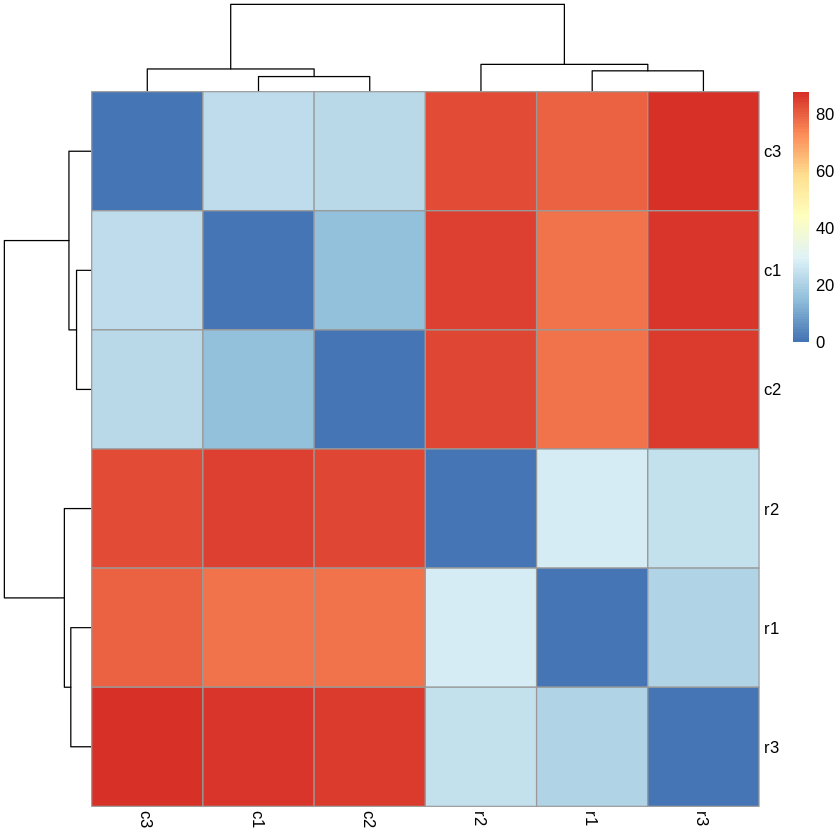

In [11]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)


In [12]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

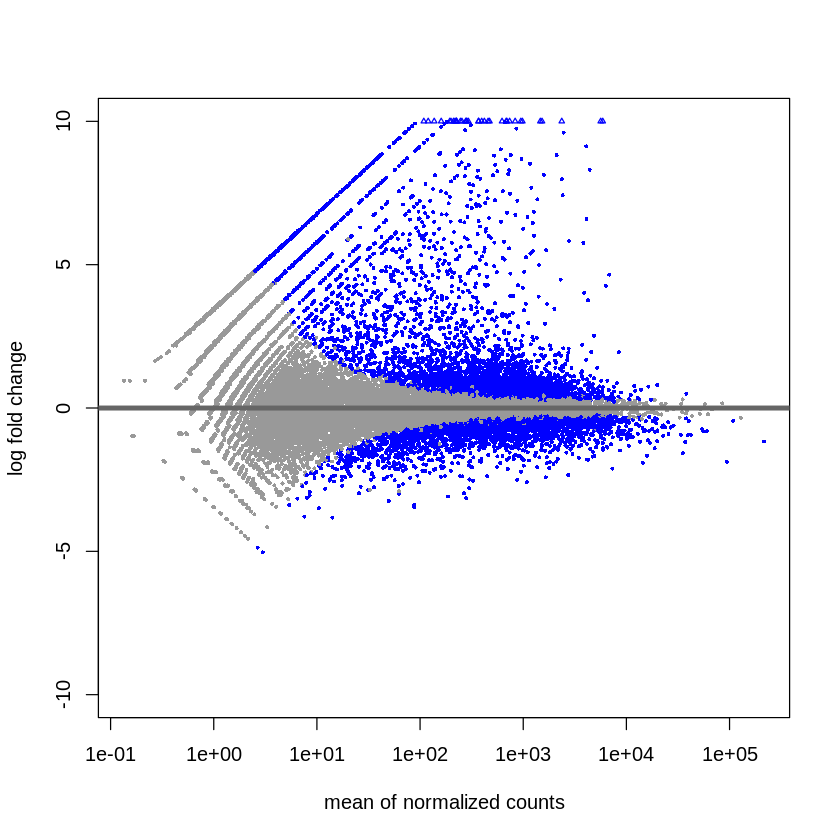

In [13]:
plotMA(res, ylim=c(-10,10))

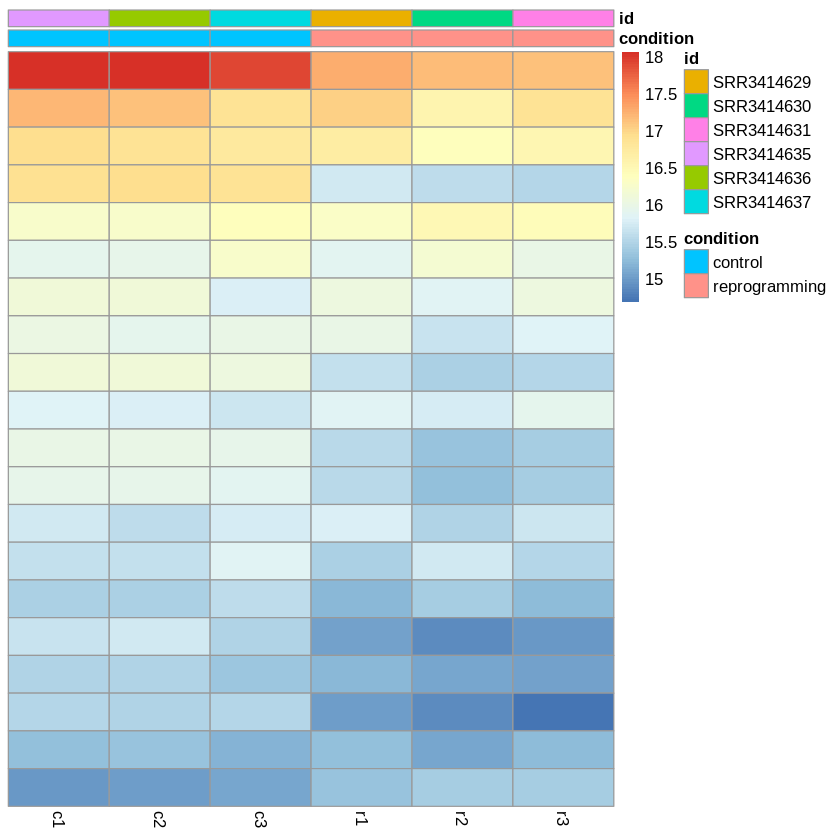

In [14]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)


In [15]:
library("tidyverse")

df2 <- read.csv("differentially_expressed_genes.txt", skip = 1, header = F, sep='\t')
colnames(df2) <- c('name', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj')
df2 %>% arrange(desc(log2FoldChange))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr

name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000058354.7,623.1840,12.72953,1.1833037,10.757617,5.456312e-27,1.596376e-25
ENSMUSG00000040728.15,419.7900,12.15939,1.1874100,10.240267,1.308748e-24,3.413802e-23
ENSMUSG00000039269.5,395.7252,12.07622,1.1845903,10.194429,2.099746e-24,5.402145e-23
ENSMUSG00000035557.9,5638.8155,11.88015,0.4936743,24.064759,5.849348e-128,2.419875e-125
ENSMUSG00000046180.11,293.8995,11.64519,1.1942744,9.750852,1.829266e-22,4.218325e-21
ENSMUSG00000048992.9,280.7020,11.58156,1.1884408,9.745173,1.934487e-22,4.446095e-21
ENSMUSG00000028699.9,277.1639,11.55963,1.1856922,9.749265,1.858083e-22,4.280006e-21
ENSMUSG00000027547.17,254.3834,11.44044,1.1902101,9.612115,7.107408e-22,1.572371e-20
ENSMUSG00000021953.14,245.9861,11.39014,1.1884971,9.583647,9.367732e-22,2.052665e-20


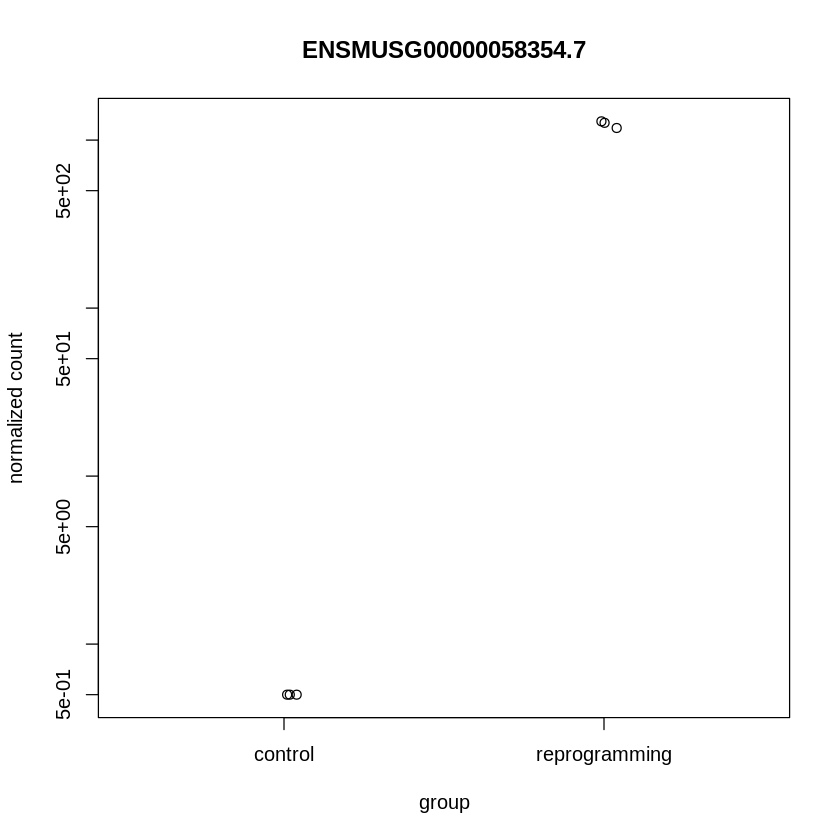

In [16]:
plotCounts(dds, gene="ENSMUSG00000058354.7", intgroup="condition")

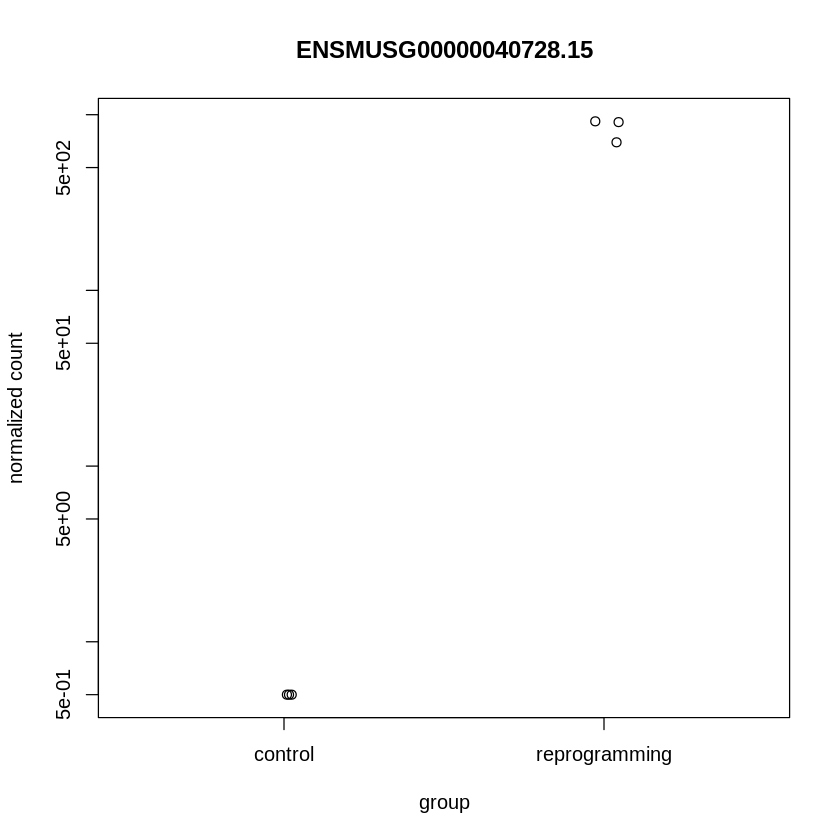

In [17]:
plotCounts(dds, gene="ENSMUSG00000040728.15", intgroup="condition")

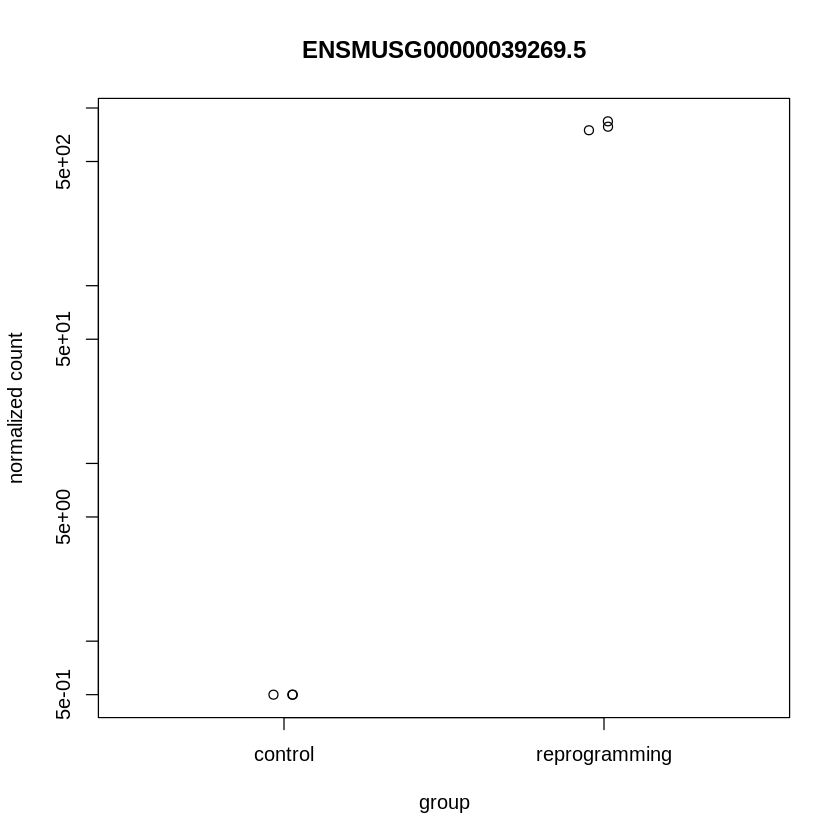

In [18]:
plotCounts(dds, gene="ENSMUSG00000039269.5", intgroup="condition")

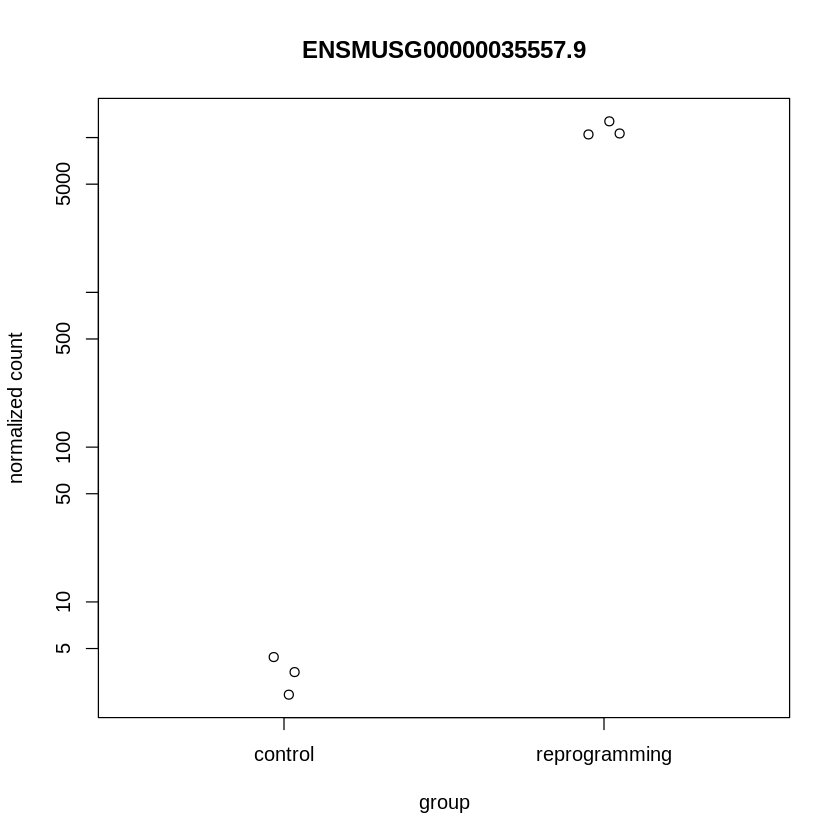

In [19]:
plotCounts(dds, gene="ENSMUSG00000035557.9", intgroup="condition")

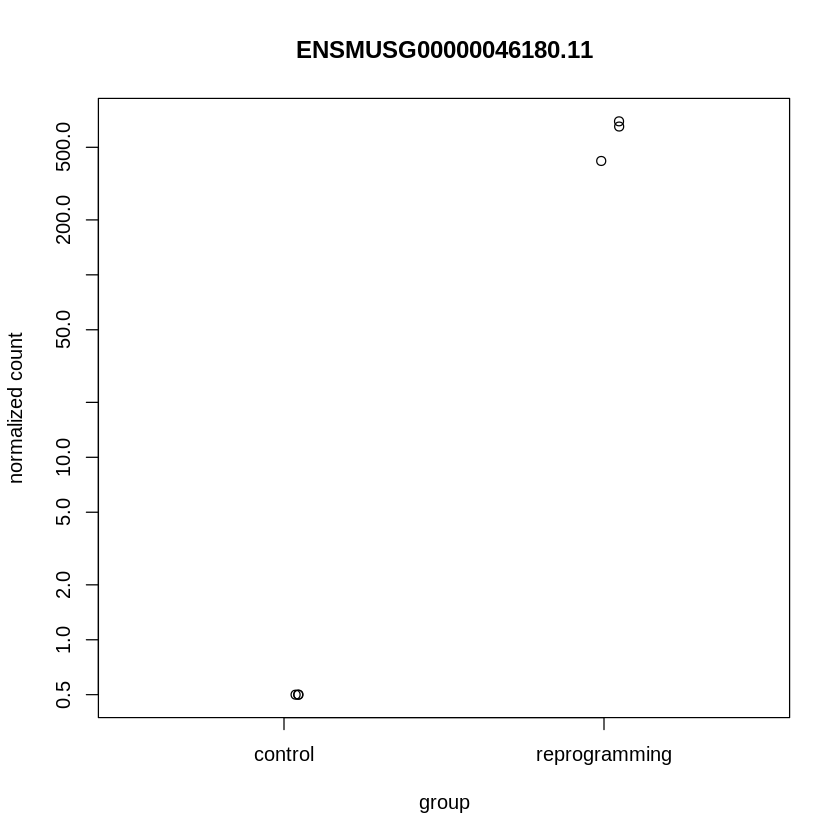

In [20]:
plotCounts(dds, gene="ENSMUSG00000046180.11", intgroup="condition")